# Bank dataset

We have a transaction details of 515 banks which include number of DD taken, Withdrawals, Deposits, Area of the branch and Average Walk-Ins. Profile the banks into segments and come up with recommendations for each segment.

# Import libraries and load data

In [333]:
from __future__ import print_function
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [334]:
data_df = pd.read_csv("bank.csv")

# Check the data. Check shape, data type, and info

In [335]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 6 columns):
Bank                   515 non-null int64
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(6)
memory usage: 24.3 KB


There are 6 columns in the dataset. All are integers and none of the columns have null values

# Checking Summary Statistic

In [336]:
data_df.describe()

,Bank,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,258.000000,232.252427,150.693204,81.687379,2934.669903,598.603883
std,148.811962,66.648815,56.897777,28.596912,437.062831,83.487891
min,1.000000,120.000000,10.000000,33.000000,1200.000000,380.000000
25%,129.500000,169.500000,103.000000,58.000000,2675.000000,537.500000
50%,258.000000,237.000000,152.000000,80.000000,2960.000000,601.000000
75%,386.500000,291.000000,200.000000,105.000000,3300.000000,657.500000
max,515.000000,350.000000,247.000000,212.000000,3650.000000,838.000000


Bank columns looks like an id column and can be dropped

In [337]:
data_df.drop(columns='Bank',inplace=True)

In [338]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 5 columns):
DD                     515 non-null int64
Withdrawals            515 non-null int64
Deposits               515 non-null int64
Branch Area in sqft    515 non-null int64
avg daily walkins      515 non-null int64
dtypes: int64(5)
memory usage: 20.2 KB


# Checking for Duplicates

In [339]:
data_df.duplicated(subset=None, keep='first').value_counts()

False    515
dtype: int64

There are no duplicate rows

In [340]:
print(data_df.corr())

                           DD  Withdrawals  Deposits  Branch Area in sqft  \
DD                   1.000000    -0.107266 -0.058830            -0.092439   
Withdrawals         -0.107266     1.000000 -0.106998            -0.189396   
Deposits            -0.058830    -0.106998  1.000000            -0.023344   
Branch Area in sqft -0.092439    -0.189396 -0.023344             1.000000   
avg daily walkins    0.653829     0.561669  0.202447            -0.186117   

                     avg daily walkins  
DD                            0.653829  
Withdrawals                   0.561669  
Deposits                      0.202447  
Branch Area in sqft          -0.186117  
avg daily walkins             1.000000  


We see the columns DD and withdrawals are correlated well with the avg daily walkins

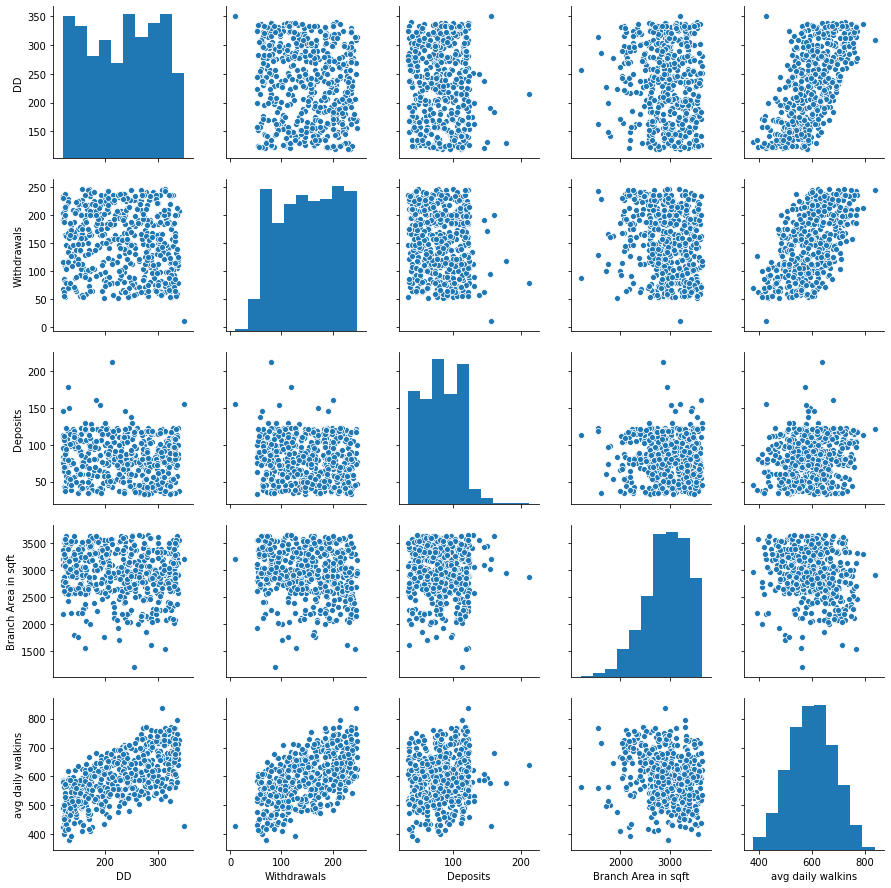

In [341]:
import seaborn as sns
sns.pairplot(data_df)

- Avg daily walkins data is normally distributed
- Branch area is negatively skewed
- Deposits is positively skewed
- DD and withdrawal are multimodal in nature
- DD and withdrawals have a positive correlation with average daily walkins
- Deposit and branch area are not correlated much with any of the other columns

# Scaling the data

In [342]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler


In [343]:
# Creating an object for the StandardScaler function
scalar = StandardScaler()
scaled_X = scalar.fit_transform(data_df)

In [344]:
scaled_X.shape

(515, 5)

In [345]:
print(scaled_X)

[[-0.07888413 -0.06497257  1.02602411 -1.08710095  0.48432644]
 [-1.64081915 -1.13811308 -0.58410514  1.31763546 -1.949528  ]
 [ 1.10758573 -0.02978763 -0.19907423 -0.83517619  0.84400936]
 ...
 [ 1.51308809 -1.13811308  0.92101568 -0.19391314  0.92793538]
 [-0.60453534  0.44520899 -1.66919225 -0.40003341 -1.12225728]
 [ 1.48305088  0.62113366  0.53598477 -0.53744692  2.01897357]]


# Creating Clusters using KMeans

### Build a KMeans model having 2 Clusters

In [346]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters=2,init='k-means++',max_iter=300,n_init=10,random_state=0)

In [347]:
# Fit K means on the scaled_df
k_means.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Check cluster Output for all the observations

In [348]:
# Get the labels
print(k_means.labels_)

[1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 0 1 0 0 0 

### Calculate within Cluster Sum of Squares

In [349]:
print(k_means.inertia_)

1943.2028663318083


In [350]:
data_df['cluster']=k_means.labels_

Visualizing the cluster

Text(0, 0.5, 'Y')

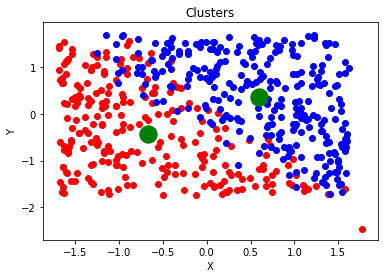

In [351]:
plt.scatter(scaled_X[k_means.labels_==0,0],scaled_X[k_means.labels_==0,1],c='red',label='cluster1')
plt.scatter(scaled_X[k_means.labels_==1,0],scaled_X[k_means.labels_==1,1],c='blue',label='cluster1')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='green',label='Centroids')
plt.title('Clusters')
plt.xlabel('X')
plt.ylabel('Y')

In [352]:
data_df['Id']=range(1,516)

C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aanan\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


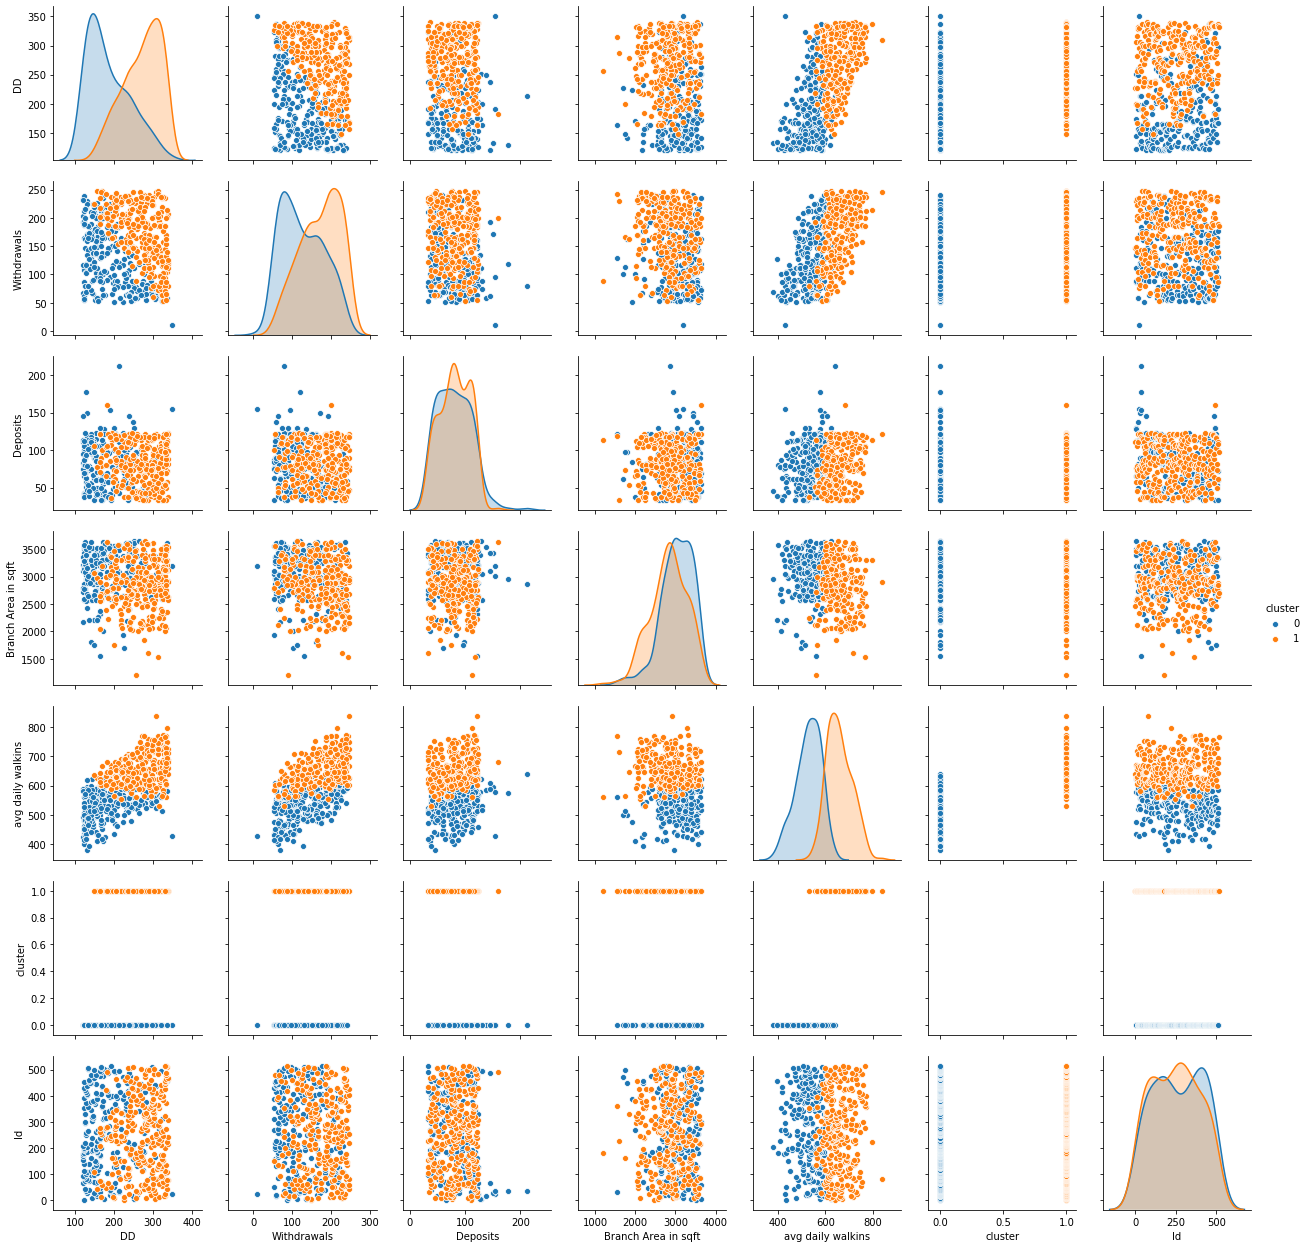

In [353]:
sns.pairplot(data_df,hue='cluster')

In [355]:
print(data_df.corr()['cluster'])

DD                     0.636139
Withdrawals            0.396413
Deposits               0.011895
Branch Area in sqft   -0.239640
avg daily walkins      0.779406
cluster                1.000000
Id                    -0.052836
Name: cluster, dtype: float64


We see the average daily walkin column has good influence on the cluster formation. Also we see there is a good correlation between DD and the cluster. Withdrawal has an little impact of the grouping. Deposits and Branch area in sqft has very less impact on the grouping 

In [356]:
print("Centroid values:")
print(k_means.cluster_centers_)

Centroid values:
[[-0.6741444  -0.42580064 -0.01287671  0.26094838 -0.83107828]
 [ 0.59295183  0.37451809  0.01132587 -0.22952029  0.73098491]]


As we do not infer anyrthing for the scaled values, lets do inverse transform on the centroids to see where exactly the centroids reside among the original data point

In [357]:
print(scalar.inverse_transform(k_means.cluster_centers_))

[[ 187.36514523  126.48962656   81.31950207 3048.60995851  529.28630705]
 [ 271.73357664  171.98175182   82.01094891 2834.45255474  659.5729927 ]]


Lets quickly see how well the clusters are distinguishable based on the avg daily walkings column

<Figure size 720x576 with 0 Axes>

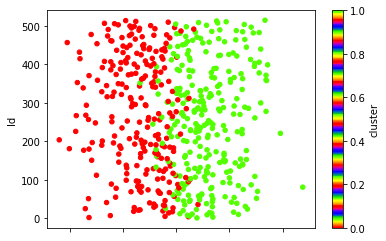

In [358]:
plt.figure(figsize=(10,8))
data_df.plot.scatter(x='avg daily walkins',y='Id',c='cluster',cmap='prism')
plt.show()

In [359]:
data_df['k_2_clusters']=k_means.labels_
cluster_profiling_k2=data_df.groupby('k_2_clusters').mean()
cluster_profiling_k2['frequency']=data_df.k_2_clusters.value_counts().sort_index()
cluster_profiling_k2

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,cluster,Id,frequency
k_2_clusters,,,,,,,,
0,187.264463,126.760331,81.326446,3045.805785,529.557851,0.0,266.342975,242
1,272.131868,171.908425,82.007326,2836.153846,659.809524,1.0,250.604396,273


Clusters are formed based majorly on the avg daily walkins column.

Cluster0: Banks with Low avg daily walkins
Cluster1: Banks with high avg daily walkins

Clusters are not completely separate with each other in k=2

### Form clusters with K = 1,3,4,5,6 and compare the WSS ( within cluster sum of squares)

In [360]:
for i in (1,3,4,5,6):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled_X)
    print("Within cluster sum of squares for",i,":",kmeans.inertia_)

Within cluster sum of squares for 1 : 2575.0
Within cluster sum of squares for 3 : 1593.8960657341067
Within cluster sum of squares for 4 : 1375.5264541522715
Within cluster sum of squares for 5 : 1220.3693507405756
Within cluster sum of squares for 6 : 1114.6008547558645


We see that as the k value increases, WSS decreases. Also, there number of units that WSS is getting decrease is also getting decreased with increase in k.

# Calculate WSS for other values of K ( can use range of K = 1 to 20) - Elbow Method

In [361]:
WCSS =[] 
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled_X)
    WCSS.append(kmeans.inertia_)

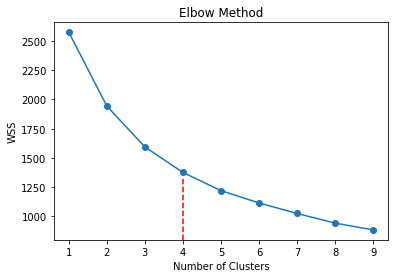

In [362]:
plt.plot(range(1,10),WCSS,marker="o")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.axvline(x=4,color='r',linestyle='--',ymax=0.28)
plt.show()

We see that after k=4 there is no significant difference in the decrease values of within cluster sum of squares. So the ideal clustering should be based k = 4

## Build a KMeans model with K=3

In [363]:
# Create K Means cluster and store the result in the object k_means
k_means3 = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)

### Use silhouette score to evaluate the above model ( 3 clusters)

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.21979497658305341


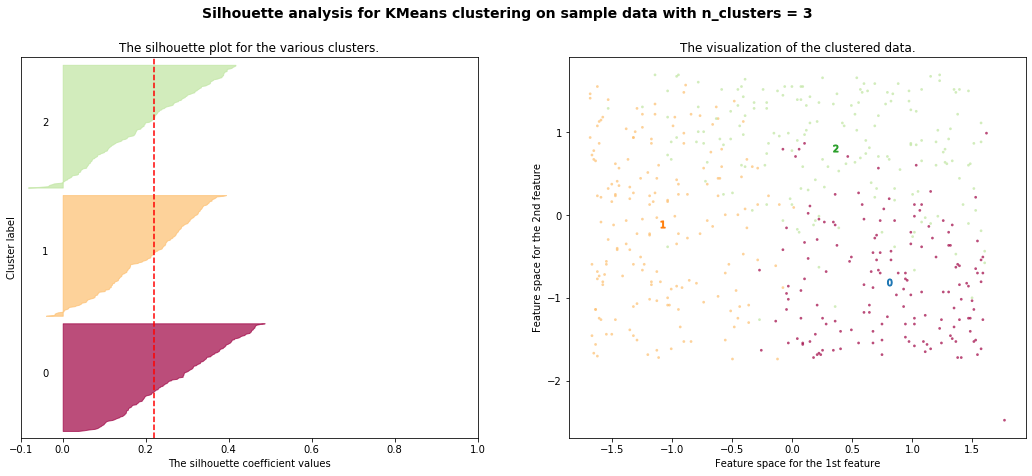

In [364]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

n_clusters=3
# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(scaled_X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
cluster_labels = k_means3.fit_predict(scaled_X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(scaled_X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_X, cluster_labels)

y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.Spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(scaled_X[:, 0], scaled_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=1, s=200)

for i, c in enumerate(centers):
             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.show()

# Build a KMeans model with K=4

### Use silhouette score to evaluate the above model ( 4 clusters)

In [365]:
# Create K Means cluster and store the result in the object k_means
k_means4 = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0)

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.22762879486901233


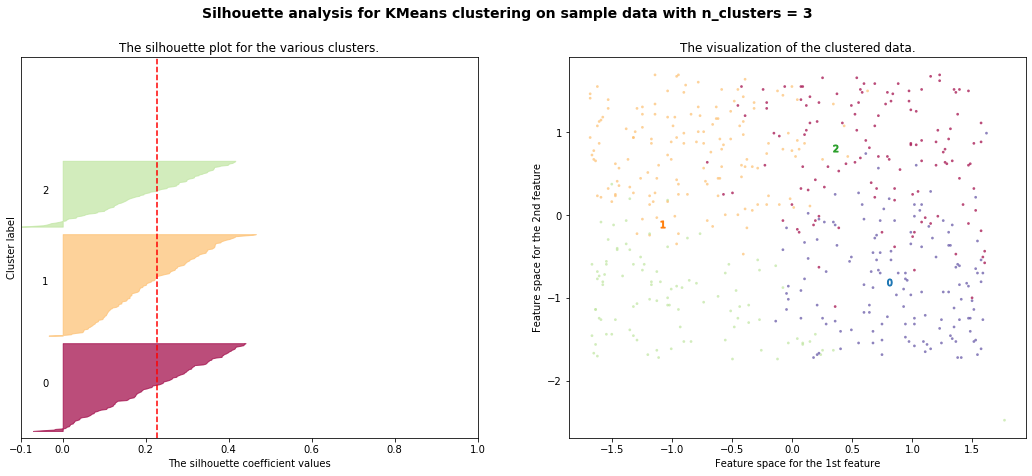

In [366]:
print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

n_clusters=3
# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(scaled_X) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
cluster_labels = k_means4.fit_predict(scaled_X)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(scaled_X, cluster_labels)
print("For n_clusters =", n_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(scaled_X, cluster_labels)

y_lower = 10

for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
    sample_silhouette_values[cluster_labels == i]
    
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.Spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(scaled_X[:, 0], scaled_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors)

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1],
            marker='o', c="white", alpha=1, s=200)

for i, c in enumerate(centers):
             ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
               "with n_clusters = %d" % n_clusters),
               fontsize=14, fontweight='bold')

plt.show()

In [367]:
data_df['k_4_clusters']=k_means4.labels_

Appending Clusters to the original dataset

# Cluster Profiling

In [368]:
data_df.k_4_clusters.value_counts().sort_index()

0    129
1    149
2     97
3    140
Name: k_4_clusters, dtype: int64

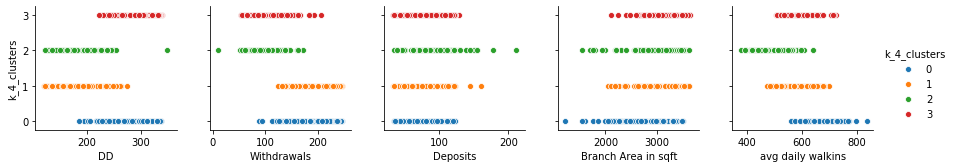

In [373]:
sns.pairplot(data_df,hue='k_4_clusters',y_vars=['k_4_clusters'],x_vars=['DD','Withdrawals','Deposits','Branch Area in sqft','avg daily walkins'])

In [374]:
print(data_df.corr()['k_4_clusters'])

DD                     0.108131
Withdrawals           -0.702698
Deposits              -0.118435
Branch Area in sqft    0.397558
avg daily walkins     -0.437373
cluster               -0.288843
Id                     0.020412
k_2_clusters          -0.288843
k_4_clusters           1.000000
Name: k_4_clusters, dtype: float64


withdrawals has a high negative correlation with the clustering formed at k=4. Avg daily walkins also have a good negative correlation with the clusters column. Branch area in sqft is the only positive correlation here though the correlation is not very strong

In [375]:
cluster_profiling_k4=data_df.groupby('k_4_clusters').mean()
cluster_profiling_k4['frequency']=data_df.k_4_clusters.value_counts().sort_index()
cluster_profiling_k4

,DD,Withdrawals,Deposits,Branch Area in sqft,avg daily walkins,cluster,Id,k_2_clusters,frequency
k_4_clusters,,,,,,,,,
0,279.007752,192.031008,89.333333,2589.224806,693.930233,1.000000,263.325581,1.000000,129
1,177.953020,194.040268,73.322148,3022.281879,580.080537,0.375839,246.825503,0.375839,149
2,169.041237,93.865979,97.319588,2995.206186,495.536082,0.000000,252.752577,0.000000,97
3,290.757143,105.842857,72.714286,3117.785714,601.892857,0.628571,268.621429,0.628571,140


# Mention your insights

At k=4, we thus see the banks can be clustered into 4 groups as follows,
- Cluster 0: Small sized banks with less deposit but highest walkins, high Withdrawals and DD
- Cluster 1: Medium sized bank with less DD & deposits, considerably high daily walkin and highest withdrawals
- Cluster 2: Medium sized bank with less withdrawal, avg daily walkin, DD but highest Deposit
- Cluster 3: Large sized bank with high average daily walkins and highest DD, but less withdrawal and least Deposits

We see this clustering is better than the clusters formed with k=2 and k=3